In [1]:
import jams
import pandas as pd
from matplotlib import lines as mlines, pyplot as plt
import os, sys

sys.path.append('../src')
import interpreter as itp

SoX could not be found!

    If you do not have SoX, proceed here:
     - - - http://sox.sourceforge.net/ - - -

    If you do (or think that you should) have SoX, double-check your
    path variables.
    


In [2]:
import soundfile as sf

In [3]:
import librosa

In [4]:
anno_dir = "../data/raw/annotation/"

In [5]:
excerpt = "00_BN1-129-Eb_comp.jams"

In [6]:
y, sr = librosa.load("../data/raw/audio_mono-mic/00_BN1-129-Eb_comp_mic.wav")

array([ 0.00961239,  0.01408114,  0.01233458, ..., -0.00337073,
       -0.00298359, -0.00296082], shape=(492253,), dtype=float32)

In [4]:
j = jams.load(os.path.join(anno_dir, excerpt))

In [5]:
j.annotations[0].namespace

'pitch_contour'

In [6]:
j.search(namespace='chord')

,time,duration,value,confidence
0,0.000,7.442,D#:maj,None
1,7.442,3.721,G#:maj,None
2,11.163,3.721,D#:maj,None
3,14.884,1.860,A#:maj,None
4,16.744,1.860,G#:maj,None
5,18.605,3.720,D#:maj,None
,time,duration,value,confidence
0,0.000,7.442,D#:sus2(7)/1,None
1,7.442,3.721,G#:maj6(*5)/1,None
2,11.163,3.721,D#:maj7/1,None


In [13]:
instructed_chords = j.search(namespace='chord')[0]
performed_chords = j.search(namespace='chord')[1]

In [15]:
performed_chords

,time,duration,value,confidence
0,0.000,7.442,D#:sus2(7)/1,None
1,7.442,3.721,G#:maj6(*5)/1,None
2,11.163,3.721,D#:maj7/1,None
3,14.884,1.860,A#:maj/1,None
4,16.744,1.860,"G#:maj6(2,b5,*5)/1",None
5,18.605,3.720,D#:maj7/1,None


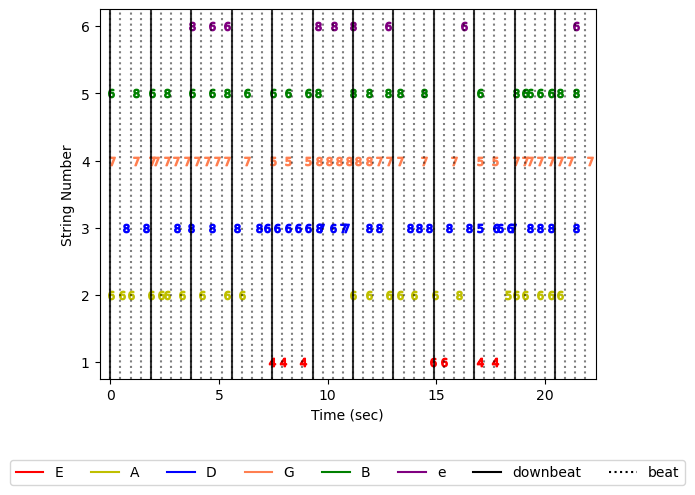

In [16]:
itp.tablaturize_jams(j)

l:\Programs\anaconda3\envs\ml-env\Lib\site-packages\librosa\core\convert.py:1094: RuntimeWarning: divide by zero encountered in log2
  midi: np.ndarray = 12 * (np.log2(np.asanyarray(frequencies)) - np.log2(440.0)) + 69
l:\Programs\anaconda3\envs\ml-env\Lib\site-packages\librosa\core\convert.py:1094: RuntimeWarning: divide by zero encountered in log2
  midi: np.ndarray = 12 * (np.log2(np.asanyarray(frequencies)) - np.log2(440.0)) + 69
l:\Programs\anaconda3\envs\ml-env\Lib\site-packages\librosa\core\convert.py:1094: RuntimeWarning: divide by zero encountered in log2
  midi: np.ndarray = 12 * (np.log2(np.asanyarray(frequencies)) - np.log2(440.0)) + 69
l:\Programs\anaconda3\envs\ml-env\Lib\site-packages\librosa\core\convert.py:1094: RuntimeWarning: divide by zero encountered in log2
  midi: np.ndarray = 12 * (np.log2(np.asanyarray(frequencies)) - np.log2(440.0)) + 69


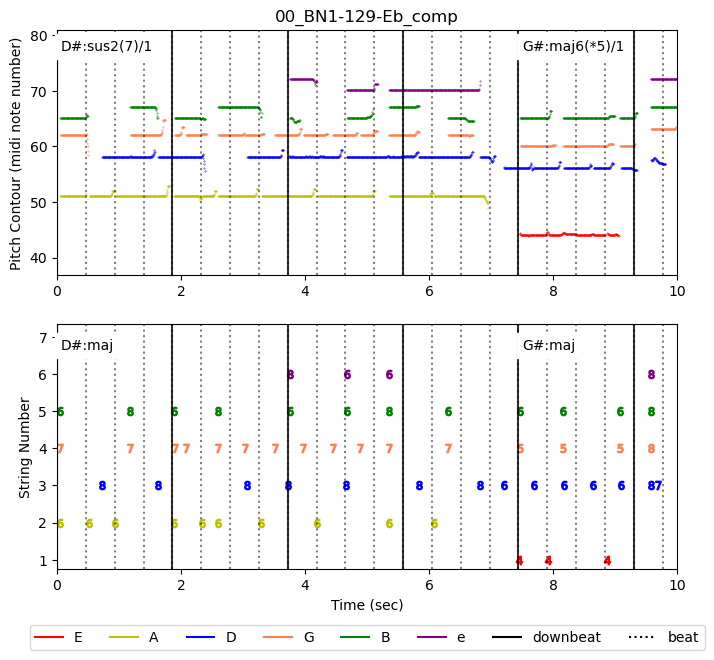

In [19]:
fig = plt.figure(figsize=(8,7))
ax1 = plt.subplot(211)
itp.visualize_jams_pt(j) #pt for pitch track
ax2 = plt.subplot(212, sharex=ax1)
itp.tablaturize_jams(j)
plt.xlim(0, 10)

itp.add_annotations(ax1, performed_chords, ygrow_ratio=0.04, label_xoffset=0.06, label_yoffset=2)
itp.add_annotations(ax2, instructed_chords, ygrow_ratio=0.2, label_xoffset=0.06, label_yoffset=-0.4)
plt.show()